### Importing relevant Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/machine learning/Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Data preprocessing

In [6]:
# checking for missing values
data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].str.split('/', expand=True)

In [8]:
# Convert the values to numeric format (integer)
data['Systolic_BP'] = pd.to_numeric(data['Systolic_BP'])
data['Diastolic_BP'] = pd.to_numeric(data['Diastolic_BP'])

In [9]:
data.drop(columns=['Blood Pressure'], inplace=True)

In [10]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [11]:
categorical_columns = data.select_dtypes('object').columns.tolist()

In [12]:
categorical_columns

['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

In [13]:
value_counts = {}
for column in categorical_columns:
  value_counts[column] = data[column].nunique()

In [14]:
value_counts

{'Gender': 2, 'Occupation': 11, 'BMI Category': 4, 'Sleep Disorder': 3}

In [15]:
data['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [16]:
for col in data.columns:
    if data[col].dtype == 'object':
        # Initialize the LabelEncoder for the current column
        label_encoder = LabelEncoder()

        # Fit and transform the LabelEncoder to convert categorical values to numerical
        data[col] = label_encoder.fit_transform(data[col])


In [17]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,5,1,28,6,5.9,4,30,8,2,85,3000,2,140,90


In [18]:
# Splitting the data
X = data.drop(columns=['Sleep Disorder'])
y = data['Sleep Disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create a Decision Tree classifier and fit it on the training data
clf = clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.88


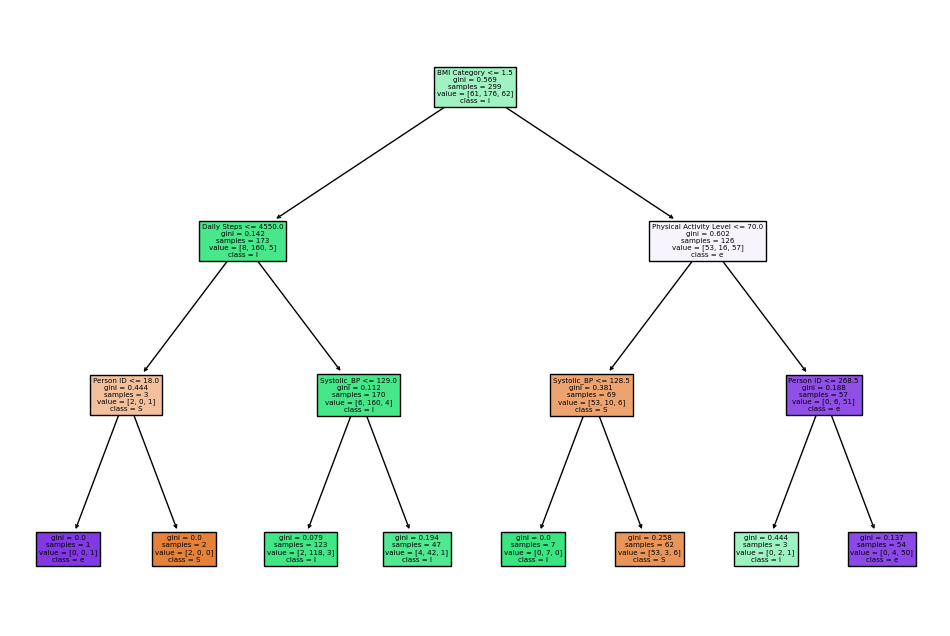

In [20]:
# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names= X.columns.tolist(), class_names='Sleep Disorder', filled=True)
plt.show()


In [21]:
# Create a Decision Tree classifier and fit it on the training data
clf = clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8533333333333334


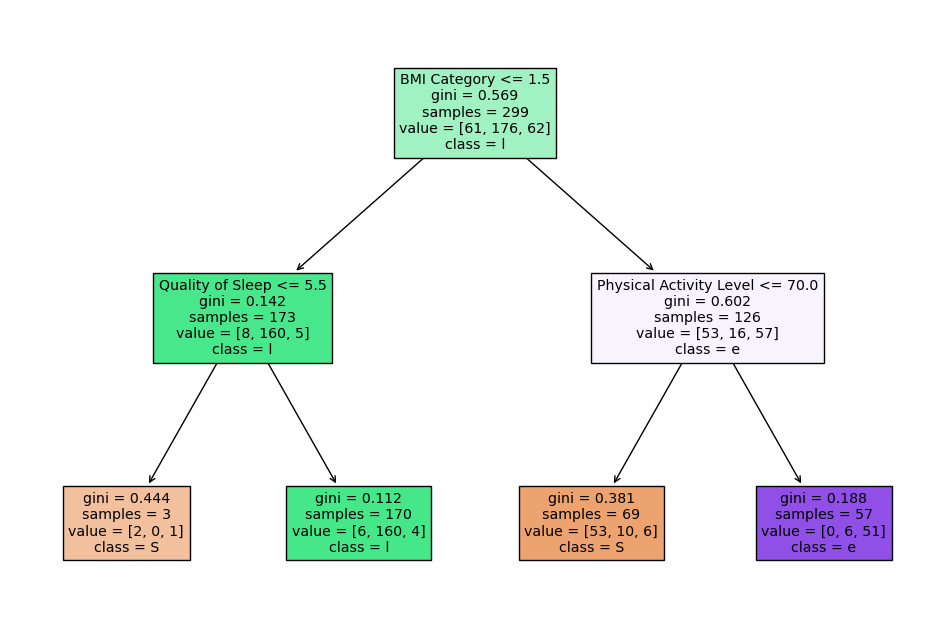

In [22]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names= X.columns.tolist(), class_names='Sleep Disorder', filled=True)
plt.show()

In [25]:
# Create a Decision Tree classifier and fit it on the training data
clf = clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9066666666666666


In [26]:
# Create a Decision Tree classifier and fit it on the training data
clf = clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8933333333333333


In [27]:
# Create a Decision Tree classifier and fit it on the training data
clf = clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9066666666666666


In [21]:
# Let's use Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# For classification tasks
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_classifier = rf_classifier.predict(X_test)
# For classification tasks
accuracy = accuracy_score(y_test, y_pred_classifier)
print("Accuracy:", accuracy)

Accuracy: 0.88


The dataset is small that's why decision trees did better in this situation. However for large datset **Random Forest**  should be your choice